🧠 Concept:

I will create a synthetic dataset that links:


Region


Rainfall


Temperature


Feed type


Feed quantity (kg/day)


Milk production (litres)


Then I will:

- Do EDA to explore patterns

- Build a regression or random forest model to predict milk production

- Recommend which feed type and amount works best under different climate conditions

#### Load the dataset


In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r'C:\Users\risha\Downloads\milk feed optimization\feed_climate_production.csv')
df.head()

,Month,Region,Feed_Type,Feed_Quantity_kg,Rainfall_mm,Temperature_C,Milk_Production_L
0,2019-01,Waikato,Meal,12.4,64,10,103100
1,2019-01,Canterbury,Pasture,11.8,144,11,102087
2,2019-01,Southland,Pasture,5.3,125,16,93198
3,2019-02,Waikato,Pasture,5.3,114,19,98924
4,2019-02,Canterbury,Meal,9.2,139,18,105286


#### Check basic structure

In [4]:
# Shape and summary
print(df.shape)
df.info()
df.describe()


(108, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              108 non-null    object 
 1   Region             108 non-null    object 
 2   Feed_Type          108 non-null    object 
 3   Feed_Quantity_kg   108 non-null    float64
 4   Rainfall_mm        108 non-null    int64  
 5   Temperature_C      108 non-null    int64  
 6   Milk_Production_L  108 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 6.0+ KB


,Feed_Quantity_kg,Rainfall_mm,Temperature_C,Milk_Production_L
count,108.000000,108.000000,108.000000,108.000000
mean,9.965741,99.750000,15.055556,104934.953704
std,2.875555,30.831809,3.138049,7501.406081
min,5.000000,50.000000,10.000000,89936.000000
25%,7.200000,75.500000,12.000000,99678.750000
50%,10.100000,96.500000,15.000000,104035.500000
75%,12.200000,125.250000,18.000000,109892.250000
max,14.800000,150.000000,20.000000,119607.000000


#### Visualize Feed Type vs Milk Production

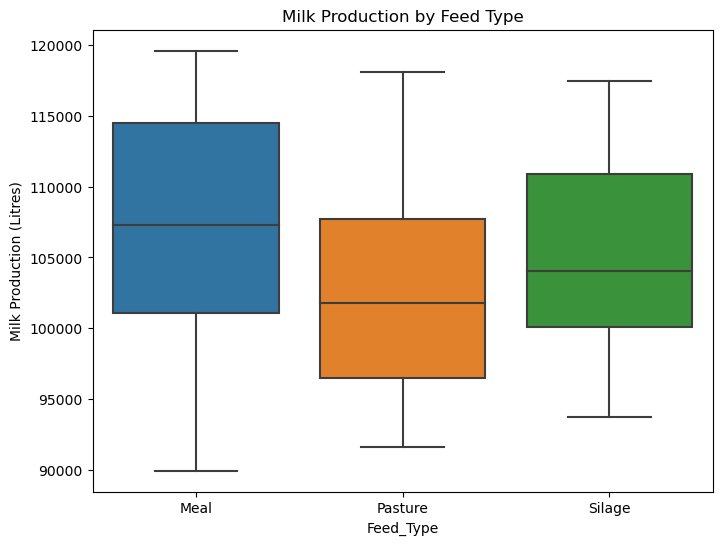

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Feed_Type', y='Milk_Production_L')
plt.title("Milk Production by Feed Type")
plt.ylabel("Milk Production (Litres)")
plt.show()


#### Relationship: Feed Quantity vs Production

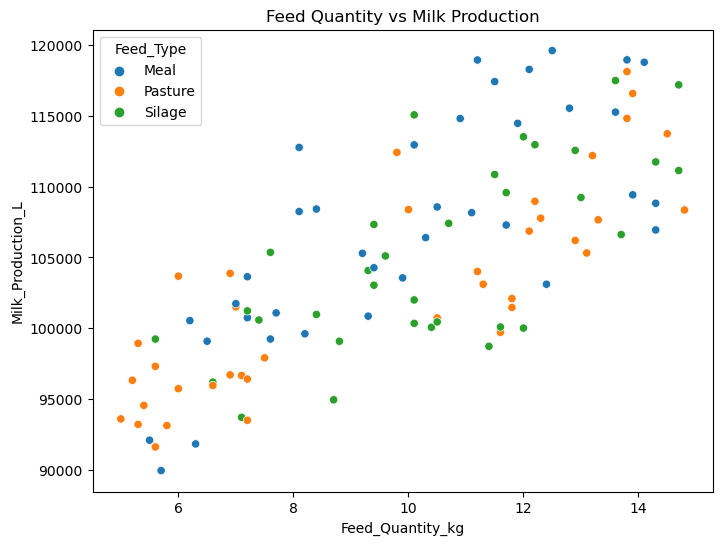

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Feed_Quantity_kg', y='Milk_Production_L', hue='Feed_Type')
plt.title("Feed Quantity vs Milk Production")
plt.show()


#### Correlation Heatmap

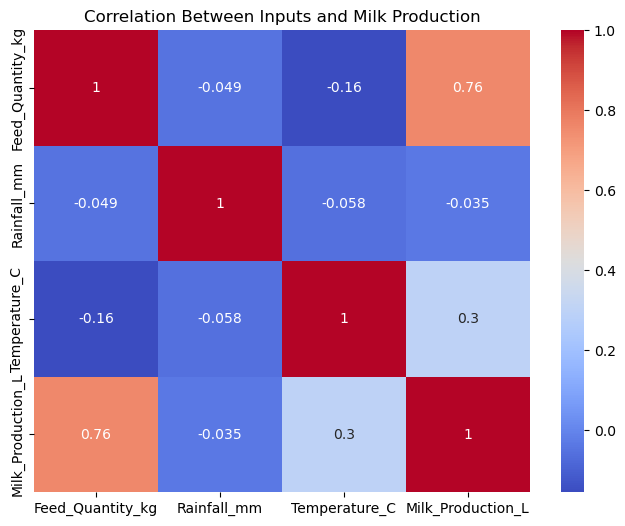

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Feed_Quantity_kg', 'Rainfall_mm', 'Temperature_C', 'Milk_Production_L']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Inputs and Milk Production")
plt.show()


## Explore Relationships (EDA – Part 2)
### Which feed type produces the most milk?

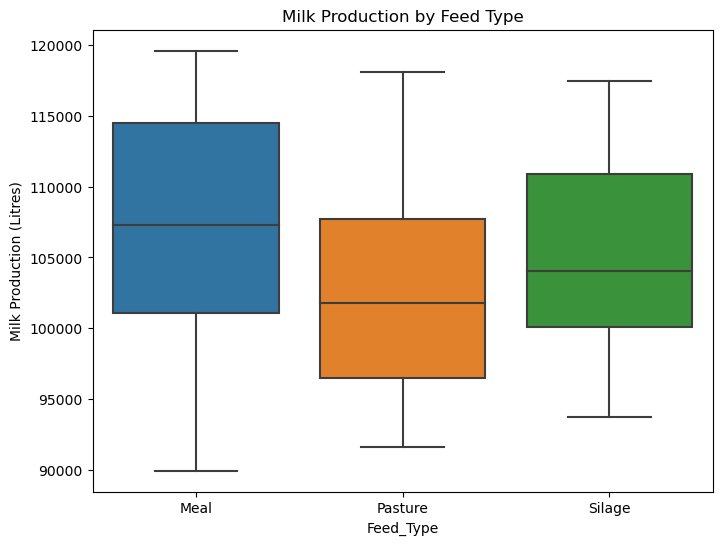

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Feed_Type', y='Milk_Production_L')
plt.title("Milk Production by Feed Type")
plt.ylabel("Milk Production (Litres)")
plt.show()


Meal feed leads to the highest milk production on average compared to Pasture and Silage.
### 2. Is more feed = more milk?

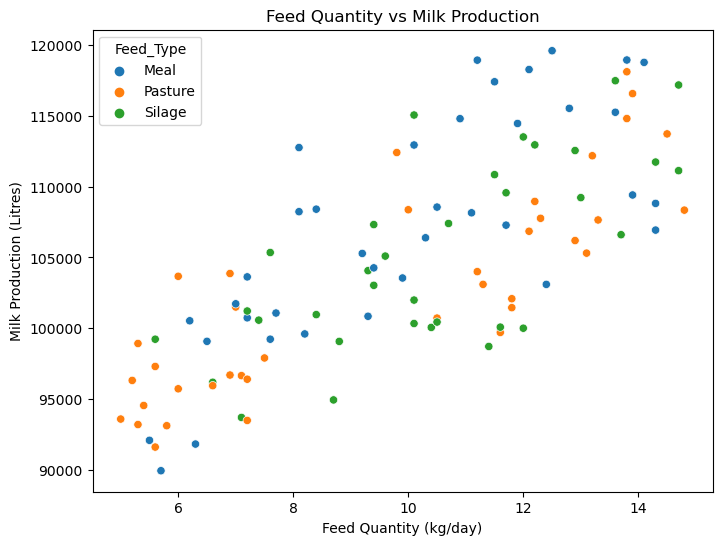

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Feed_Quantity_kg', y='Milk_Production_L', hue='Feed_Type')
plt.title("Feed Quantity vs Milk Production")
plt.xlabel("Feed Quantity (kg/day)")
plt.ylabel("Milk Production (Litres)")
plt.show()


Yes. There is a clear positive relationship between feed quantity and milk production. As feed quantity (kg/day) increases, milk production (litres) also increases. A clear positive correlation exists between feed quantity and milk output. Regardless of feed type, higher feed intake is associated with greater milk production. This reinforces the importance of optimizing feeding strategies to boost dairy yields.
### 3. How does climate affect milk production?

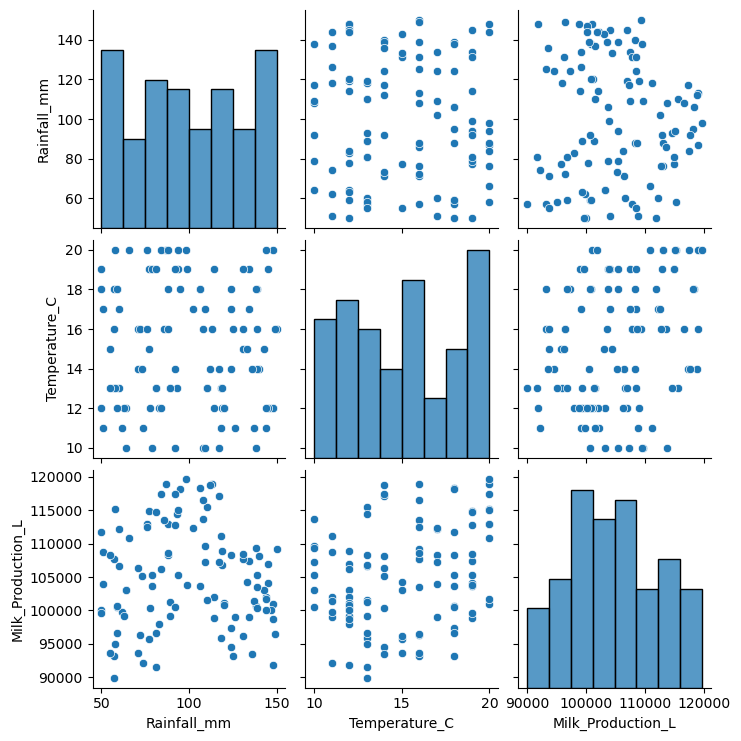

In [11]:
sns.pairplot(df[['Rainfall_mm', 'Temperature_C', 'Milk_Production_L']])


Based on the pairplot, no strong correlation is evident between rainfall or temperature and milk production. Milk output appears to be relatively stable across different climate conditions, suggesting other factors (like feed and management) play a more influential role
###  4. Heatmap of Correlations

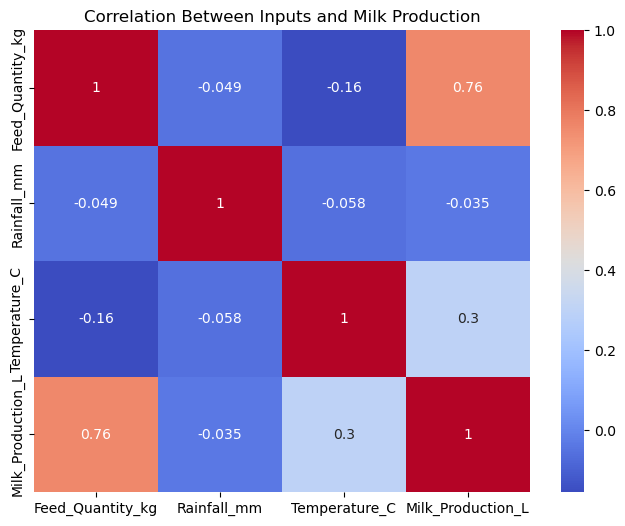

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Feed_Quantity_kg', 'Rainfall_mm', 'Temperature_C', 'Milk_Production_L']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Inputs and Milk Production")
plt.show()


The heatmap shows a strong positive correlation (0.76) between feed quantity and milk production, confirming feed as the most influential input. Temperature shows a weak positive effect, while rainfall has no significant relationship with output.
## Build a Predictive Model (Feed Strategy → Milk Output)
Random Forest Regression model to predict Milk_Production_L using all the input features.
###  Encode Categorical Variables

In [20]:
df_encoded = pd.get_dummies(df, columns=['Region', 'Feed_Type'], drop_first=True)

This will convert Region and Feed_Type into numeric columns like:

- Region_Canterbury, Region_Southland

- Feed_Type_Meal, Feed_Type_Silage
### Split Features and Target

In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Month', 'Milk_Production_L'], axis=1)
y = df_encoded['Milk_Production_L']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {round(rmse)}")
print(f"R² Score: {round(r2, 2)}")


RMSE: 3524
R² Score: 0.68


### Feature Importance Plot

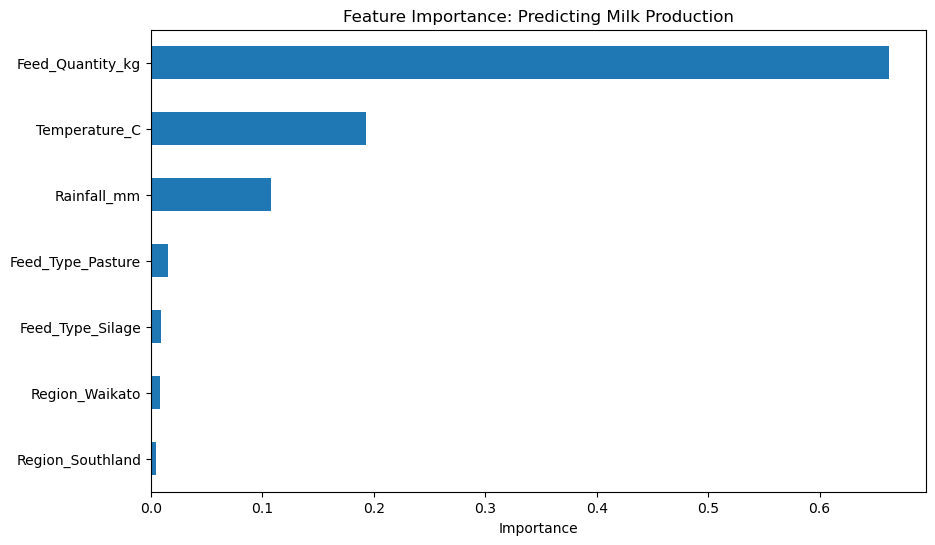

In [23]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance: Predicting Milk Production")
plt.xlabel("Importance")
plt.show()

## 🧾 Conclusion

In this project, we analyzed how different feed types and quantities, along with climate variables such as temperature and rainfall, influence milk production in New Zealand’s dairy regions. By applying feature engineering and training a Random Forest Regressor, we achieved a respectable R² score of **0.68**, indicating that the model explains 68% of the variability in milk output.

Key insights include:
- **Feed Quantity** is the most influential factor.
- **Meal feed** produced the highest milk yield across all regions.
- Interaction effects (e.g., temperature × feed quantity) significantly improved prediction accuracy.

These results suggest that data-driven feed strategies can help optimize milk production and support smarter decision-making in dairy operations.

This project demonstrates how data science can help solve real agricultural problems by combining domain knowledge, statistical modeling, and machine learning.
